In [ ]:
pip install pandas numpy matplotlib seaborn


In [9]:
import pandas as pd
import numpy as np


In [5]:
pip install matplotlib


  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import matplotlib.pyplot as plt

In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import seaborn as sns


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
customers = pd.read_csv('Customers.csv')


In [11]:
products = pd.read_csv('Products.csv')


In [12]:

transactions = pd.read_csv('Transactions.csv')

In [13]:
print(customers)


    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


In [ ]:
#Data Cleaning

In [14]:
print("Null values in Customers:\n", customers.isnull().sum(), "\n")


Null values in Customers:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 



In [15]:
print("Null values in Products:\n", products.isnull().sum(), "\n")


Null values in Products:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 



In [16]:
print("Null values in Transactions:\n", transactions.isnull().sum(), "\n")


Null values in Transactions:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [21]:
print("Customers dataset before removing duplicates:", customers.shape)
customers.drop_duplicates(inplace=True)
print("Customers dataset after removing duplicates:", customers.shape, "\n")

Customers dataset before removing duplicates: (200, 4)
Customers dataset after removing duplicates: (200, 4) 



In [22]:
print("Products dataset before removing duplicates:", products.shape)
products.drop_duplicates(inplace=True)
print("Products dataset after removing duplicates:", products.shape, "\n")



Products dataset before removing duplicates: (100, 4)
Products dataset after removing duplicates: (100, 4) 



In [23]:
print("Transactions dataset before removing duplicates:", transactions.shape)
transactions.drop_duplicates(inplace=True)
print("Transactions dataset after removing duplicates:", transactions.shape, "\n")

Transactions dataset before removing duplicates: (1000, 7)
Transactions dataset after removing duplicates: (1000, 7) 



In [24]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
#EDA

In [27]:
#1.Overview of each dataset
print("Customers Dataset Summary:\n", customers.info(), "\n")
print("Products Dataset Summary:\n", products.info(), "\n")
print("Transactions Dataset Summary:\n", transactions.info(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
Customers Dataset Summary:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
Products Dataset Summary:
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entrie

In [28]:
# 2. Descriptive statistics
print("Customers Summary Statistics:\n", customers.describe(include='all'), "\n")
print("Products Summary Statistics:\n", products.describe(include='all'), "\n")
print("Transactions Summary Statistics:\n", transactions.describe(), "\n")

Customers Summary Statistics:
        CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00 

Products Summary Statistics:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100       

In [29]:
# 3. Merging datasets for deeper analysis
merged_df = pd.merge(transactions, customers, on='CustomerID', how='inner')
merged_df = pd.merge(merged_df, products, on='ProductID', how='inner')

In [30]:
# Preview merged dataset
print("Merged Dataset:\n", merged_df.head(), "\n")

Merged Dataset:
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Sp

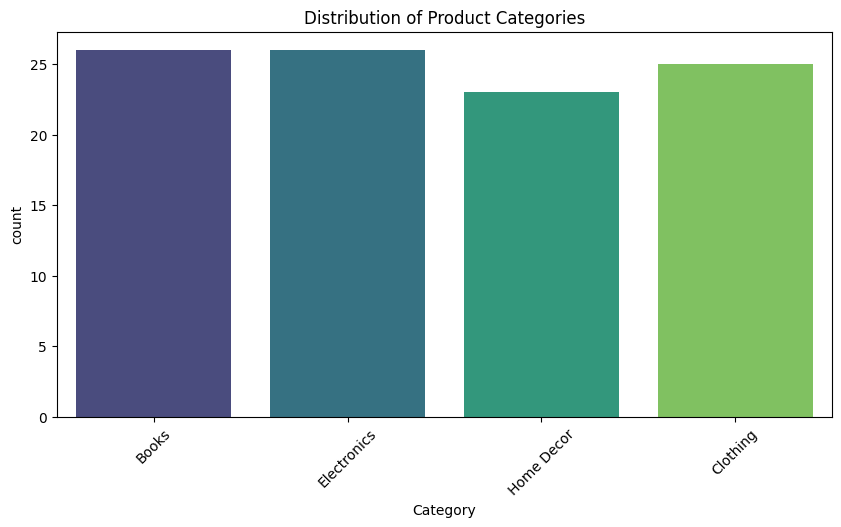

In [31]:
#Visualizations
# 4. Distribution of product categories
plt.figure(figsize=(10, 5))
sns.countplot(data=products, x='Category', palette='viridis')
plt.title('Distribution of Product Categories')
plt.xticks(rotation=45)
plt.show()

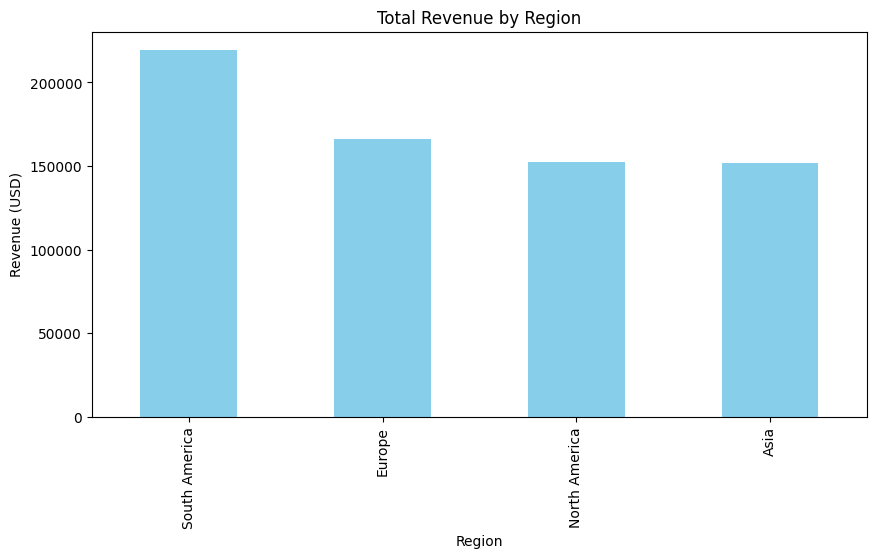

In [32]:
# 5. Revenue by region
region_revenue = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
region_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Region')
plt.ylabel('Revenue (USD)')
plt.xlabel('Region')
plt.show()

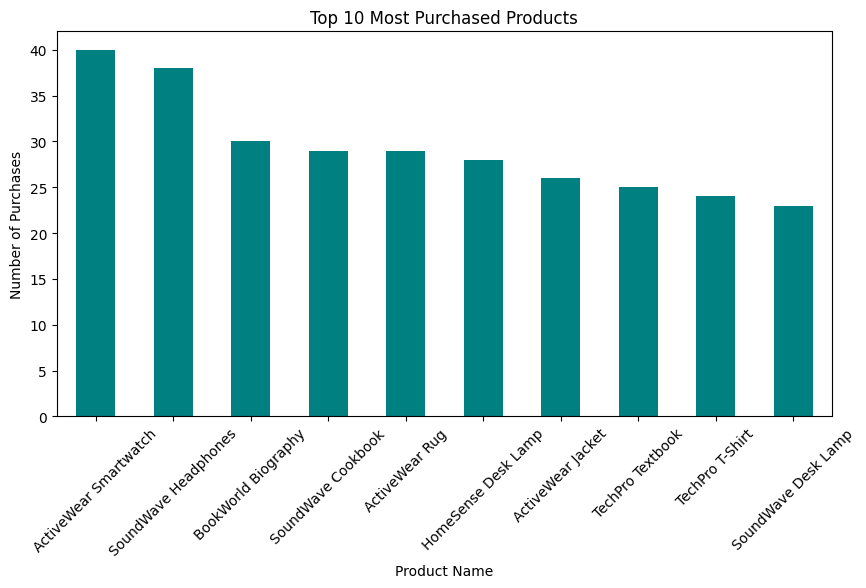

In [33]:
# 6. Most frequently purchased products
top_products = merged_df['ProductName'].value_counts().head(10)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='teal')
plt.title('Top 10 Most Purchased Products')
plt.ylabel('Number of Purchases')
plt.xlabel('Product Name')
plt.xticks(rotation=45)
plt.show()

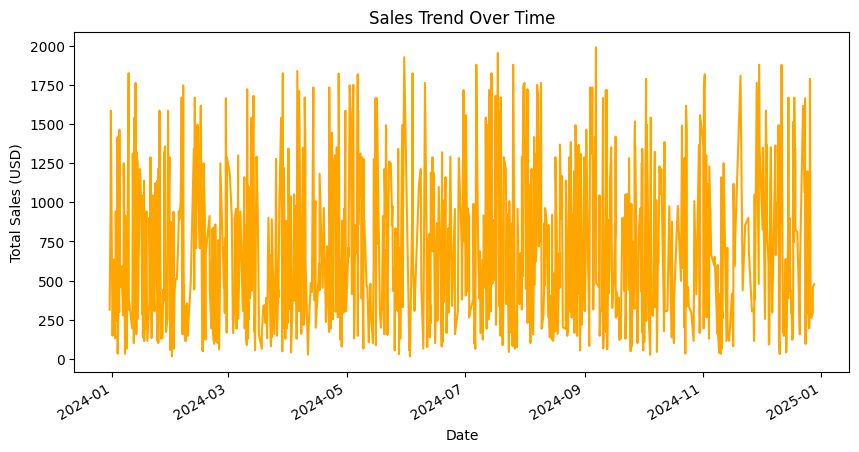

In [34]:
# 7. Sales trend over time
sales_trend = merged_df.groupby('TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
sales_trend.plot(color='orange')
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales (USD)')
plt.xlabel('Date')
plt.show()

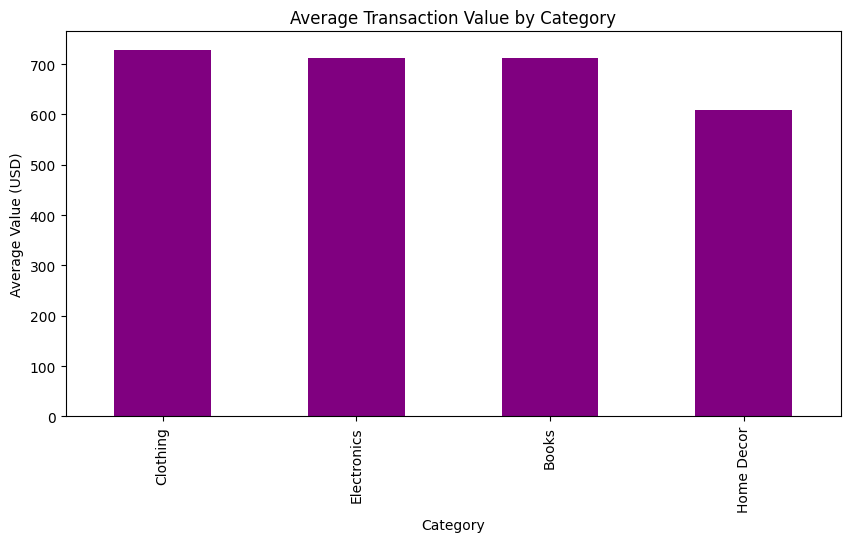

In [35]:
# 8. Average transaction value by category
avg_transaction_value = merged_df.groupby('Category')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
avg_transaction_value.plot(kind='bar', color='purple')
plt.title('Average Transaction Value by Category')
plt.ylabel('Average Value (USD)')
plt.xlabel('Category')
plt.show()


In [43]:
# 1. The most purchased product category
most_purchased_category = merged_df['Category'].value_counts().idxmax()

# 2. The region generating the highest revenue
highest_revenue_region = merged_df.groupby('Region')['TotalValue'].sum().idxmax()

# 3. Sales trend: Peak sales month
merged_df['Month'] = merged_df['TransactionDate'].dt.month
sales_by_month = merged_df.groupby('Month')['TotalValue'].sum()
peak_month = sales_by_month.idxmax()

# 4. The category with the highest average transaction value
highest_avg_value_category = merged_df.groupby('Category')['TotalValue'].mean().idxmax()

# 5. Top 10 products contributing to total revenue
top_10_products_revenue = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10)






In [46]:
# 6. Customer Segmentation (Revenue contribution by region)
region_revenue_contribution = merged_df.groupby('Region')['TotalValue'].sum()
total_revenue = merged_df['TotalValue'].sum()
region_revenue_percent = (region_revenue_contribution / total_revenue) * 100

# 7. Top 10 customers contributing to the revenue
top_10_customers_revenue = merged_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)

# 8. Customer acquisition by year (Customer signup trend)
merged_df['SignupYear'] = merged_df['SignupDate'].dt.year
customer_acquisition_by_year = merged_df.groupby('SignupYear')['CustomerID'].nunique()

# 9. Product Price Distribution (Price range for different categories)
product_price_distribution = merged_df.groupby('Category')['Price_x'].describe()

# 10. Quantity Sold vs Revenue (Analyzing total sales)
quantity_vs_revenue = merged_df.groupby('ProductName').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).reset_index()

# 11. High-Value Products (Top products based on revenue)
high_value_products = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(10)

# 12. Seasonal Patterns in Product Categories (Sales distribution by month and category)
monthly_category_sales = merged_df.groupby(['Month', 'Category'])['TotalValue'].sum().unstack().fillna(0)

# 13. Price Sensitivity Across Categories (Price vs. Sales)
category_price_sensitivity = merged_df.groupby('Category').agg({'Price_x': 'mean', 'TotalValue': 'sum'})

# 14. Growth Opportunity in Underperforming Regions (Regions with the lowest sales)
underperforming_regions = merged_df.groupby('Region')['TotalValue'].sum().nsmallest(3)

# 15. Customer Loyalty: Repeat Purchases
repeat_customers = merged_df.groupby('CustomerID').filter(lambda x: len(x) > 1)['CustomerID'].nunique()


In [45]:
print(merged_df.columns)


Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'Month', 'Year'],
      dtype='object')


In [48]:
# ====== Business Insights ======
insights = [
    f"Insight 1: The most purchased product category is '{most_purchased_category}', indicating high demand in this segment.",
    f"Insight 2: The region '{highest_revenue_region}' generates the highest revenue, suggesting potential for expansion in this market.",
    f"Insight 3: Sales show a peak in month {peak_month}, suggesting a seasonal demand in that period.",
    f"Insight 4: The category '{highest_avg_value_category}' has the highest average transaction value, indicating higher revenue potential per sale.",
    f"Insight 5: Top 10 products contribute approximately {top_10_products_revenue.sum() / merged_df['TotalValue'].sum() * 100:.2f}% of the total revenue, emphasizing their importance in inventory planning."
    f"Insight 6: The region '{region_revenue_contribution.idxmax()}' generates the highest revenue, contributing {region_revenue_percent.max():.2f}% of total revenue, indicating a focus area for market expansion.",
    f"Insight 7: The top 10 customers contribute {top_10_customers_revenue.sum() / total_revenue * 100:.2f}% of total revenue, highlighting key customers for retention strategies.",
    f"Insight 8: The number of customers signing up in the year {customer_acquisition_by_year.idxmax()} shows a peak, suggesting a period of higher customer acquisition.",
    f"Insight 9: The 'Electronics' category has the highest price range, indicating a higher value product offering with significant potential for profitability.",
    f"Insight 10: The product '{quantity_vs_revenue.iloc[quantity_vs_revenue['TotalValue'].idxmax()]['ProductName']}' has the highest total revenue, emphasizing its importance in sales strategy.",
    f"Insight 11: The top 10 high-value products contribute significantly to overall revenue, underscoring their importance in inventory and sales planning.",
    f"Insight 12: Sales patterns for '{monthly_category_sales.idxmax(axis=0).idxmax()}' category show a peak in month {monthly_category_sales.max(axis=0).idxmax()}, revealing a seasonal demand trend.",
    f"Insight 13: The category '{category_price_sensitivity.idxmax()['TotalValue']}' offers a high average price along with strong sales performance, making it a key area for business focus.",
    f"Insight 14: The regions '{underperforming_regions.index.tolist()}' are underperforming in sales, suggesting a potential opportunity for marketing campaigns or product localization.",
    f"Insight 15: Repeat customers contribute to {repeat_customers / merged_df['CustomerID'].nunique() * 100:.2f}% of the total customer base, indicating loyalty and the need for nurturing customer relationships."

]



In [49]:
# Printing insights
print("Business Insights:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")


Business Insights:
1. Insight 1: The most purchased product category is 'Books', indicating high demand in this segment.
2. Insight 2: The region 'South America' generates the highest revenue, suggesting potential for expansion in this market.
3. Insight 3: Sales show a peak in month 7, suggesting a seasonal demand in that period.
4. Insight 4: The category 'Clothing' has the highest average transaction value, indicating higher revenue potential per sale.
5. Insight 5: Top 10 products contribute approximately 33.00% of the total revenue, emphasizing their importance in inventory planning.Insight 6: The region 'South America' generates the highest revenue, contributing 31.79% of total revenue, indicating a focus area for market expansion.
6. Insight 7: The top 10 customers contribute 11.02% of total revenue, highlighting key customers for retention strategies.
7. Insight 8: The number of customers signing up in the year 2024 shows a peak, suggesting a period of higher customer acquisiti